In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Orders data

In [2]:
orders_path = '/home/alex/zriveAM/zrive-ds/aws/data/orders.parquet'
orders_df = pd.read_parquet(orders_path)
orders_df.head(5)

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [3]:
print("Dataframe shape:",orders_df.shape)
print("----------------------------------")
print("Dataframe info:")
print(orders_df.info())
print("----------------------------------")
print("Null values:")
print(orders_df.isnull().sum())

Dataframe shape: (8773, 6)
----------------------------------
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB
None
----------------------------------
Null values:
id                0
user_id           0
created_at        0
order_date        0
user_order_seq    0
ordered_items     0
dtype: int64


In [4]:
#Let's create a new column with the nbumber of items per order
orders_df['number_of_ordered_items'] = orders_df['ordered_items'].apply(len)
orders_df.head(20)

,id,user_id,created_at,order_date,user_order_seq,ordered_items,number_of_ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",14
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058...",25
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618...",15
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624...",10
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163...",10
51,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,"[33667168796804, 33667178594436, 3366720605402...",8
53,2219446730884,7ce6569d75a8bc75b72516e059edecb0bc2245750bfa68...,2020-05-04 23:57:21,2020-05-04,1,"[33667178594436, 33667184492676, 3366721657254...",9
61,2222574076036,f4f0753d9919c6d39afc6b1d797a34e31224698d5d92a5...,2020-05-05 21:09:55,2020-05-05,1,"[33667168829572, 33667195437188, 3366721860416...",11
68,2224066986116,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,2020-05-06 10:23:11,2020-05-06,1,"[33667171221636, 33667177382020, 3366717856166...",15
70,2224765862020,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,2020-05-06 16:03:35,2020-05-06,1,"[33667174695044, 33667203596420, 3366720589018...",6


Orders evolution


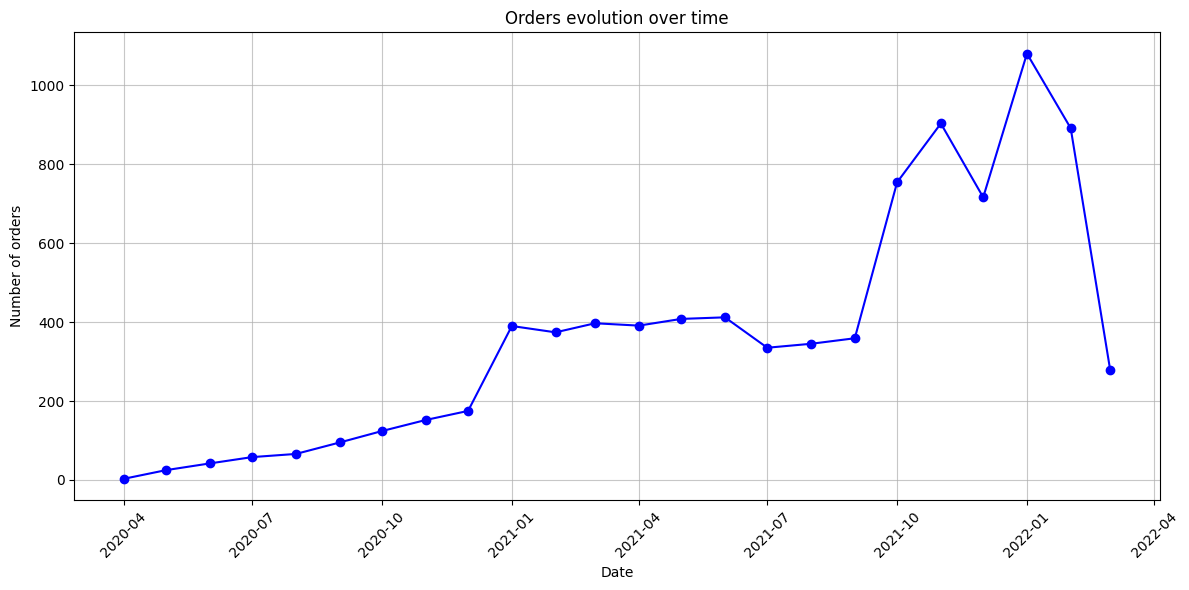

In [5]:
#evolution of orders in the last years

print("Orders evolution")

orders_by_month = orders_df.groupby(orders_df['created_at'].dt.to_period('M')).size()
orders_by_month.index = orders_by_month.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(orders_by_month.index, orders_by_month.values, marker='o', linestyle='-', color='b')
plt.title('Orders evolution over time')
plt.xlabel('Date')
plt.ylabel('Number of orders')
plt.grid(True, alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count    8773.000000
mean       12.305711
std         6.839507
min         1.000000
25%         8.000000
50%        11.000000
75%        15.000000
max       114.000000
Name: number_of_ordered_items, dtype: float64


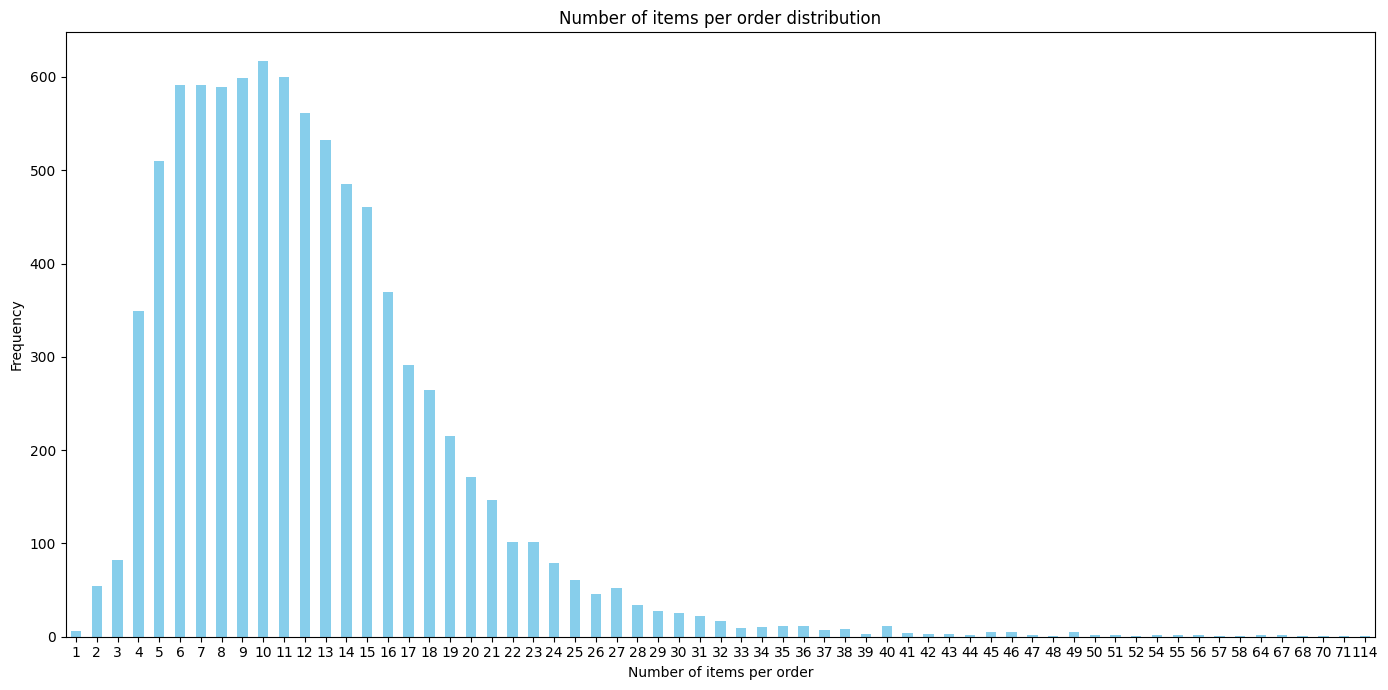

In [6]:
#numer_of_ordereds_items distribution
summary = orders_df['number_of_ordered_items'].describe()
print(summary)


item_counts = orders_df['number_of_ordered_items'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Number of items per order distribution')
plt.xlabel('Number of items per order')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

In [7]:
#Unique clients
unique_clients=orders_df['user_id'].value_counts()
print(unique_clients)

user_id
ba7176c5f870cd86e51ecc4375e0becc8cc305845e70b9384ba0d4d156c6099ec96602b15420cb1ff69b6b9adcf9249d09489d511565531c4e928a92157b16d6    25
114e78a8909ad3f9d481e66563998301eff9e7cd1b2d002b77ffc26619f0ef7a6e877d5b3460e0e0bde2d7c67787c66d7384ccf34b4aa4fa1409e978cf47e670    22
04e9d7967f4dfd7d40175f130f1c80f62204ff697df92dfd83407ace7997b6744b6a7cab0382e60f7264b13ba3f03c64f016ae9dca664885ace6020aba3b5131    22
1296e1e72f7f43ff28d7d285f880ad4d213fa8139233c78ad2673af4cc0c1c297180254da494cc3b934858347822be437eeb072acb1403e9476dc0b2f6a83cbe    21
a655b992a3ee5f6aa9f5ab5662c4befac1fdc45c99885b173618b661ca7381c383b1364e977c9f51366cdc62e4d92ff383e8e5aac7ea9a552059be2671de24e2    21
                                                                                                                                    ..
720193c88605b61f880b340ca9a02c673241a37ff74f7d20639fc933ed5438a3b96076b85f168231d34779994c26810adbb24e0d842639837780649a4baf16a8     1
76f2a192182b2d88816355ac40307d4323c6d62da2a27d9

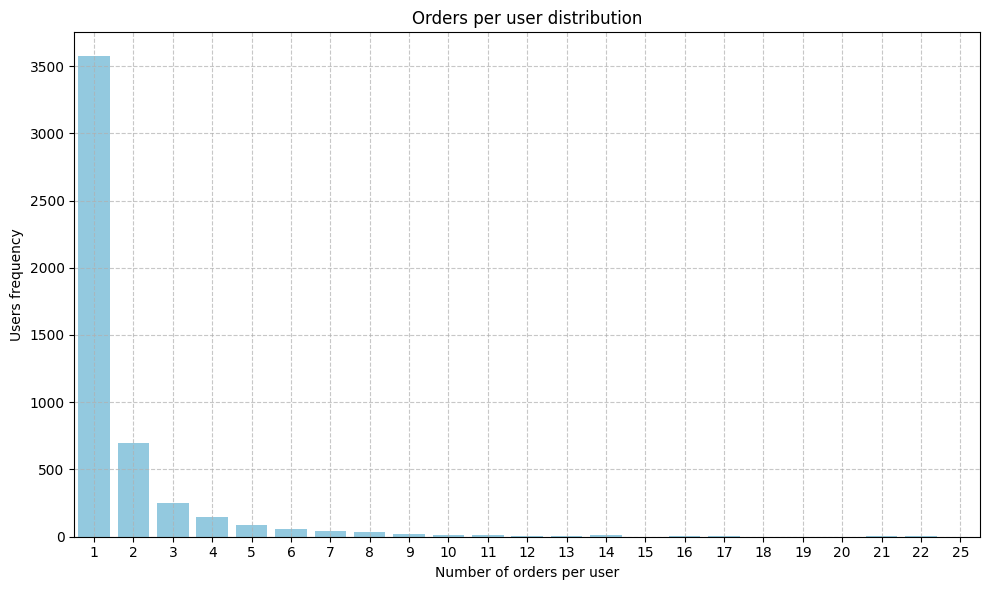

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts_unique_clients.index, y=value_counts_unique_clients.values, color='skyblue')

plt.title('Orders per user distribution')
plt.xlabel('Number of orders per user')
plt.ylabel('Users frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Users with 1 order: 3572
Users with more than 1 order: 1411


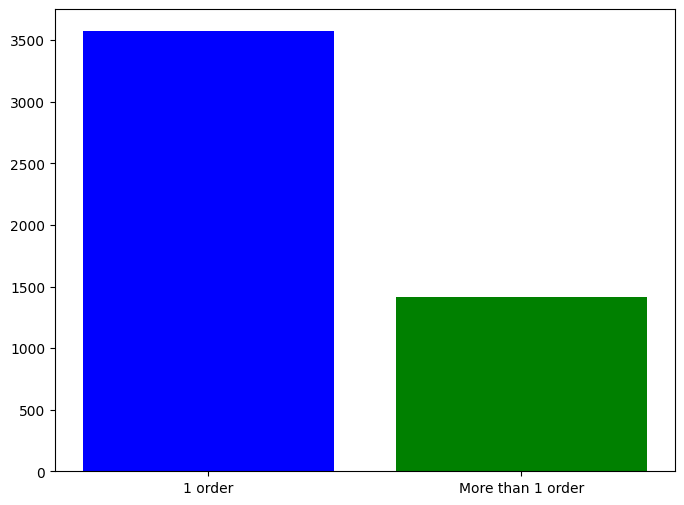

Clients that repeated buying in our platform: 28.316275336142887 %


In [9]:
num_users_with_1_order = (unique_clients == 1).sum()
print(f'Users with 1 order: {num_users_with_1_order}')
num_users_with_more_than_1_order = (unique_clients > 1).sum()
print(f"Users with more than 1 order: {num_users_with_more_than_1_order}")
categories= ['1 order', 'More than 1 order']
counts=[num_users_with_1_order, num_users_with_more_than_1_order]

plt.figure(figsize=(8,6))
plt.bar(categories, counts, color=['blue', 'green'])
plt.tight_layout
plt.show()

percentage_clients_repeat= num_users_with_more_than_1_order / (num_users_with_more_than_1_order + num_users_with_1_order)
print(f"Clients that repeated buying in our platform: {percentage_clients_repeat*100} %")

In [81]:
#Lets' examine the items in the orders

all_products = [product for sublist in orders_df['ordered_items'] for product in sublist]
print(type(all_products))

product_series = pd.Series(all_products)
print(product_series.dtype)
product_counts = product_series.value_counts().reset_index()
product_counts.columns = ['variant_id', 'Frequency']
product_counts = product_counts.sort_values(by='Frequency', ascending=False)
print(product_counts.head(5))
print(product_counts.tail(5))

<class 'list'>
int64
       variant_id  Frequency
0  34081589887108       4487
1  39284117930116       2658
2  34137590366340       1459
3  34081331970180       1170
4  34284951863428       1133
          variant_id  Frequency
1995  33618862440580          1
1996  33618893570180          1
1997  33618891145348          1
1998  33619012288644          1
2116  33618849693828          1


/tmp/ipykernel_108952/943115832.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


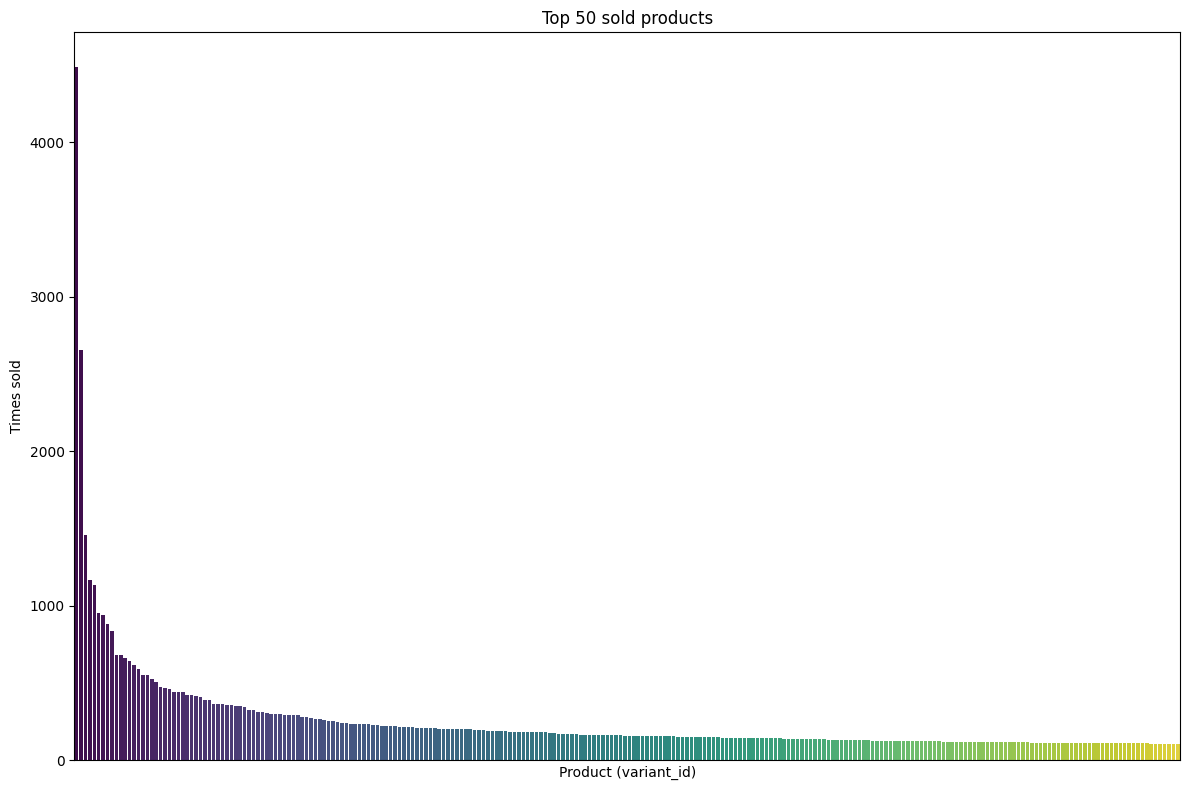

In [58]:
top_50_products = product_counts.head(250)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='variant_id', 
    y='Frequency', 
    data=top_50_products, 
    palette='viridis',
    order=top_50_products['variant_id']
)


plt.title('Top 50 sold products')
plt.xlabel('Product (variant_id)')
plt.ylabel('Times sold')
plt.xticks([])
plt.tight_layout()
plt.show()

In [76]:
inventory_path = '/home/alex/zriveAM/zrive-ds/aws/data/inventory.parquet'
inventory_df = pd.read_parquet(inventory_path)
print(inventory_df.shape)
inventory_df.head()

(1733, 6)


,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [82]:
print(product_counts.shape)

(2117, 2)


In the inventory df we have 1733 variant_ids (products), while in the one extracted from the orders we have 2117 ids

In [77]:
#Complete product_counts dataframe with information from inventory
combined_df = pd.merge(
    product_counts,          # DataFrame izquierdo
    inventory_df,            # DataFrame derecho
    on='variant_id',         # Columna común para la unión
    how='left'               # Tipo de unión (left, right, inner, outer)
)


combined_df.head()

,variant_id,Frequency,price,compare_at_price,vendor,product_type,tags
0,34081589887108,4487,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"
1,39284117930116,2658,NaN,NaN,NaN,NaN,NaN
2,34137590366340,1459,NaN,NaN,NaN,NaN,NaN
3,34081331970180,1170,NaN,NaN,NaN,NaN,NaN
4,34284951863428,1133,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]


## Problema: Productos que no estan registrados en la tabla de inventory

## Regulars data

In [10]:
regulars_path = '/home/alex/zriveAM/zrive-ds/aws/data/regulars.parquet'
regulars_df = pd.read_parquet(regulars_path)
regulars_df.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [11]:
print("Dataframe shape:", regulars_df.shape)
print("----------------------------------")
print("Dataframe info:")
print(regulars_df.info())
print("----------------------------------")
print("Null values:")
print(regulars_df.isnull().sum())


Dataframe shape: (18105, 3)
----------------------------------
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB
None
----------------------------------
Null values:
user_id       0
variant_id    0
created_at    0
dtype: int64


## Abandoned_carts data

In [12]:
abdandoned_carts_path = '/home/alex/zriveAM/zrive-ds/aws/data/abandoned_carts.parquet'
abandoned_carts_df = pd.read_parquet(abdandoned_carts_path)
abandoned_carts_df.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


In [13]:
print("Dataframe shape:", abandoned_carts_df.shape)
print("----------------------------------")
print("Dataframe info:")
print(abandoned_carts_df.info())
print("----------------------------------")
print("Null values:")
print(abandoned_carts_df.isnull().sum())


Dataframe shape: (5457, 4)
----------------------------------
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB
None
----------------------------------
Null values:
id            0
user_id       0
created_at    0
variant_id    0
dtype: int64


## Inventory data

In [78]:
inventory_path = '/home/alex/zriveAM/zrive-ds/aws/data/inventory.parquet'
inventory_df = pd.read_parquet(inventory_path)
inventory_df.head(10)

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]
5,34460976447620,2.79,2.85,carex,hand-soap-sanitisers,"[hand-soap, refills]"
6,33667202121860,8.99,12.55,ecover,washing-liquid-gel,"[cruelty-free, eco, vegan, washing-liquid-gel]"
7,39478260695172,1.99,2.00,napolina,cooking-sauces,"[pasta-pizza-sauce, vegan]"
8,39772627533956,1.99,2.30,thepinkstuff,cleaning-products,"[all-purpose-cleaner, vegan]"
9,39887964766340,2.59,2.69,profusion,tins-packaged-foods,"[gluten-free, meat-alternatives, organic, vegan]"


In [79]:
print("Dataframe shape:", inventory_df.shape)
print("----------------------------------")
print("Dataframe info:")
print(inventory_df.info())
print("----------------------------------")
print("Null values:")
print(inventory_df.isnull().sum())


Dataframe shape: (1733, 6)
----------------------------------
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB
None
----------------------------------
Null values:
variant_id          0
price               0
compare_at_price    0
vendor              0
product_type        0
tags                0
dtype: int64


## Users data

In [16]:
users_path = '/home/alex/zriveAM/zrive-ds/aws/data/users.parquet'
users_df = pd.read_parquet(users_path)
users_df.head(5)

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


Este dataframe es el que más variables incluye y haya que explicar significados:

* user_id: id del cliente

* user_segment: algún tipo de distintivo de clientes (top up y proposition)

* user_nuts1: region de uk (UKH - East of England, UKD - North West England, ec)

* first _ordered_at: Fecha exacta primer pedido (día, mes y año)

* customer_cohort_month: Mes y año de primer pedido (hacer cohorts para estudiar grupos con mismo mes y año)

* count_people: numero de personas asociadas al id

* count_adults: numero de adultos asociados al id

* count_children: numero de niños asociados al id

* count_babies: numero de bebés asociados al id

* count_pets: numero de mascotas asociados al id

In [17]:
print("Dataframe shape:", users_df.shape)
print("----------------------------------")
print("Dataframe info:")
print(users_df.info())
print("----------------------------------")
print("Null values:")
print(users_df.isnull().sum())


Dataframe shape: (4983, 10)
----------------------------------
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB
None
----------------------------------
Null values:
user_id                     0
user_segment                0
user_nuts1               

In [18]:
users_df['user_segment'].value_counts()

user_segment
Top Up         2643
Proposition    2340
Name: count, dtype: int64

In [19]:
users_df['count_people'].value_counts()

count_people
2.0    97
3.0    68
4.0    67
1.0    57
5.0    24
6.0     8
0.0     2
7.0     1
8.0     1
Name: count, dtype: int64

In [20]:
feature_frame_path = '/home/alex/zriveAM/zrive-ds/aws/data/feature_frame.csv'
feature_frame_df = pd.read_csv(feature_frame_path)
print(feature_frame_df.shape)

(2880549, 27)
